<a href="https://colab.research.google.com/github/AndresPautrat/Topicos_UPC/blob/main/Hospitales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

     |████████████████████████████████| 28.9MB 145kB/s 
     |████████████████████████████████| 1.3MB 42.5MB/s 
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


In [ ]:
from ortools.sat.python import cp_model # CP-SAT solver

from random import randint
import matplotlib.pyplot as plt # Data visualization
plt.rcParams["figure.figsize"] = (40,15)

In [ ]:
n_hospitales = 5
n_pacientes = 500
n_camas_en_hospitales = [randint(10, 100) for i in range(n_hospitales)]
print(n_camas_en_hospitales)
n_camas_total = sum(n_camas_en_hospitales)

# Localizacion
pacientes_loc = [(randint(0, 100), randint(0, 100)) for _ in range(n_pacientes)]
hospitales_loc = [(randint(0, 100), randint(0, 100)) for _ in range(n_hospitales)]  

# grado de contagio
pacientes_contagio = [randint(1, 5) for _ in range(n_pacientes)]

[17, 15, 13, 14, 26]


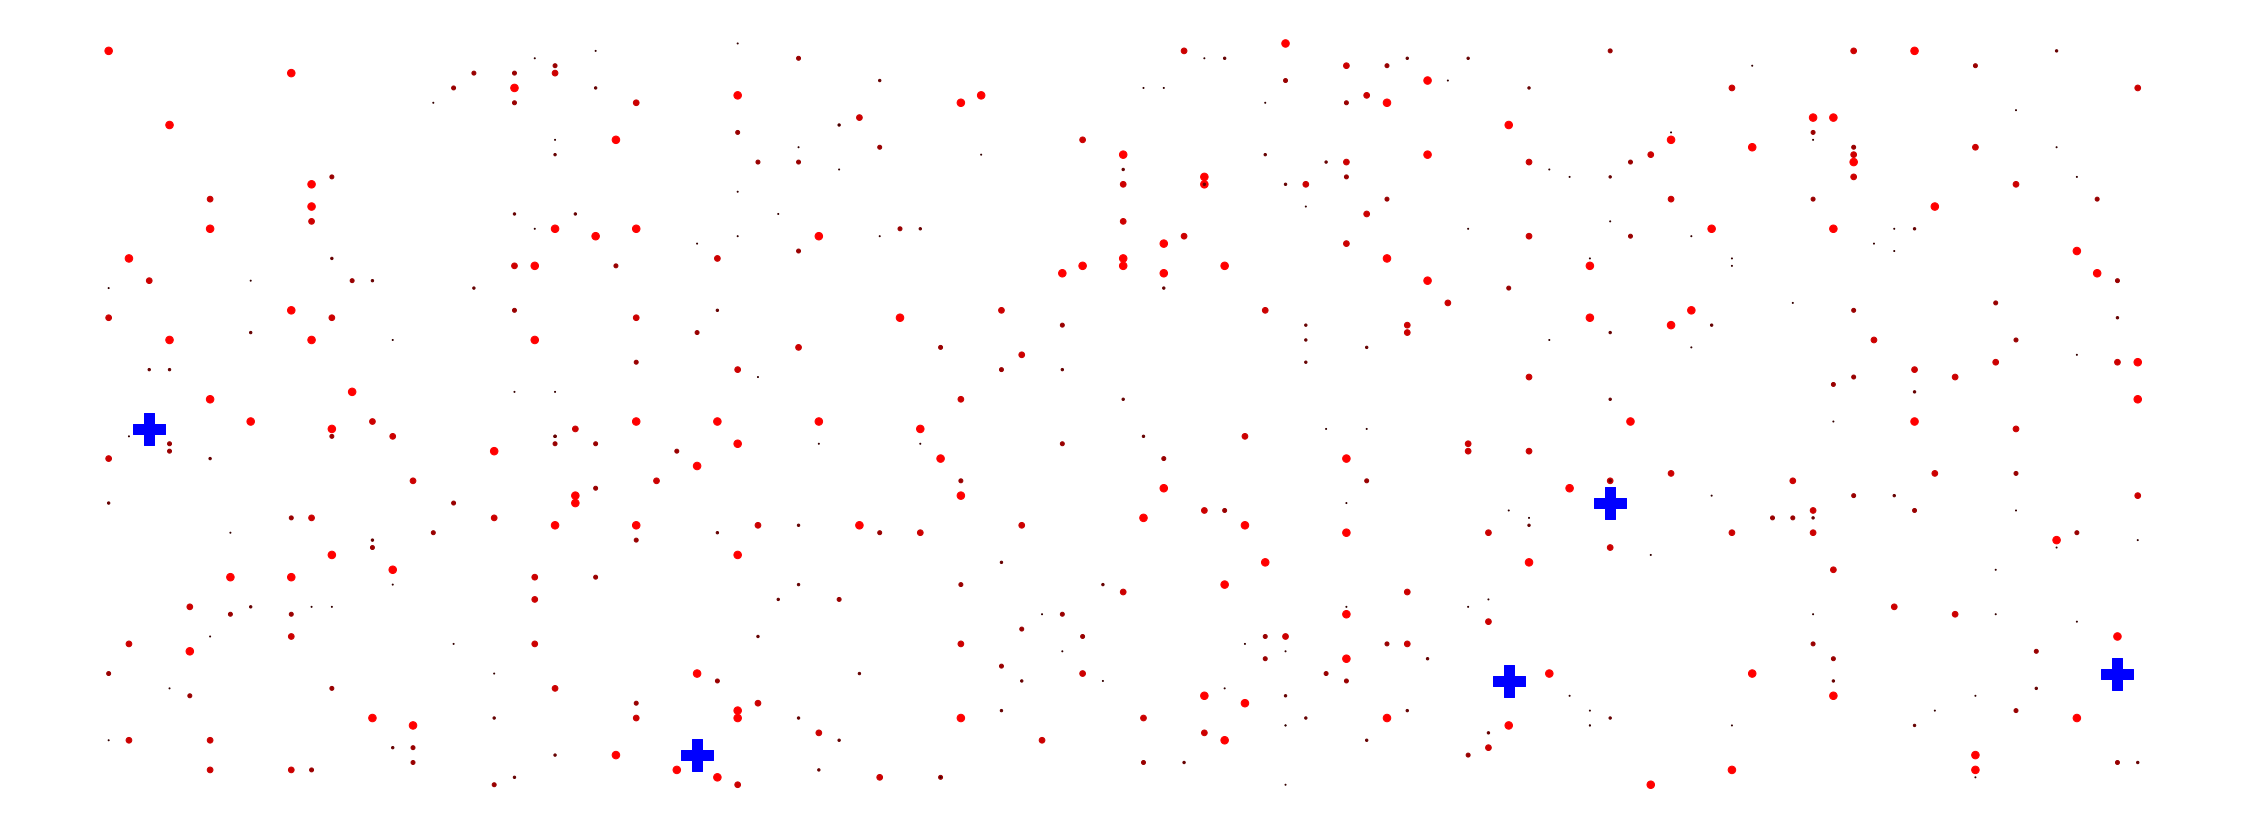

In [ ]:
# Visualizacion
sombra_contagio = [int(sev*255/5) for sev in pacientes_contagio]
color_contagio = ["#%02x0000" % (sev) for sev in sombra_contagio]
tamano_contagio = [k**2.5 for k in pacientes_contagio]
plt.scatter(*zip(*pacientes_loc), s=tamano_contagio, c=color_contagio, label="Patients")
plt.scatter(*zip(*hospitales_loc), s=1000, c="b", marker="P", label="Hospitals")
#plt.legend()
plt.axis('off')
plt.show()

In [ ]:
def dist(p1,p2):
  return int(((p1[0]-p2[0])**2-(p1[1]+p2[1])**2)**(1/2))

model = cp_model.CpModel()

# variables y dominios
x = {} #diccionarios en python
for i in range(n_hospitales):
  for j in range(n_camas_en_hospitales[i]):
    for k in range(n_pacientes):
      x[(i,j,k)] = model.NewBoolVar("x_" + str(i) + "_" + str(j) + "_" + str(k))

l = []
for i in range(n_hospitales):
  for j in range(n_camas_en_hospitales[i]):
    for k in range(n_pacientes):
      l += [(1+pacientes_contagio[k]-dist(pacientes_loc[k],hospitales_loc[i]))*x[(i,j,k)]]
#model.Add(sum(l) > 0)
model.Maximize(sum(l))

#constraints
for i in range(n_hospitales):
  for j in range(n_camas_en_hospitales[i]):
    model.Add(sum([x[(i,j,k)] for k in range(n_pacientes)]) <= 1)

for k in range(n_pacientes):
  n_paciente_en_camas_hospitales = []
  for i in range(n_hospitales):
    n_paciente_en_camas_hospitales += [sum([x[(i,j,k)] for j in range(n_camas_en_hospitales[i])])]
  model.Add(sum(n_paciente_en_camas_hospitales) <= 1)

TypeError: ignored

In [ ]:
solver=cp_model.CpSolver()
status=solver.Solve(model)
print(solver.StatusName(status))

OPTIMAL


In [ ]:
print("N pacientes atendidos:",solver.ObjectiveValue())
print("Tiempo:",solver.WallTime())
for i in range(n_hospitales):
  print("Hospital", i + 1,hospitales_loc[i])
  for j in range(n_camas_en_hospitales[i]):
    for k in range(n_pacientes):
      if solver.Value(x[(i,j,k)]) == 1:
        print("\tPaciente", k + 1, "en cama", j + 1)
  print()

N pacientes atendidos: 510.0
Tiempo: 5.271192696
Hospital 1 (82, 22)
	Paciente 180 en cama 1
	Paciente 151 en cama 2
	Paciente 315 en cama 3
	Paciente 353 en cama 4
	Paciente 172 en cama 5
	Paciente 16 en cama 6
	Paciente 304 en cama 7
	Paciente 98 en cama 8
	Paciente 252 en cama 9
	Paciente 76 en cama 10
	Paciente 170 en cama 11
	Paciente 232 en cama 12
	Paciente 112 en cama 13
	Paciente 35 en cama 14
	Paciente 283 en cama 15
	Paciente 218 en cama 16
	Paciente 345 en cama 17

Hospital 2 (14, 17)
	Paciente 32 en cama 1
	Paciente 57 en cama 2
	Paciente 277 en cama 3
	Paciente 369 en cama 4
	Paciente 323 en cama 5
	Paciente 158 en cama 6
	Paciente 92 en cama 7
	Paciente 118 en cama 8
	Paciente 219 en cama 9
	Paciente 246 en cama 10
	Paciente 75 en cama 11
	Paciente 129 en cama 12
	Paciente 80 en cama 13
	Paciente 374 en cama 14
	Paciente 347 en cama 15

Hospital 3 (22, 94)
	Paciente 59 en cama 1
	Paciente 60 en cama 2
	Paciente 269 en cama 3
	Paciente 31 en cama 4
	Paciente 212 en cama 5

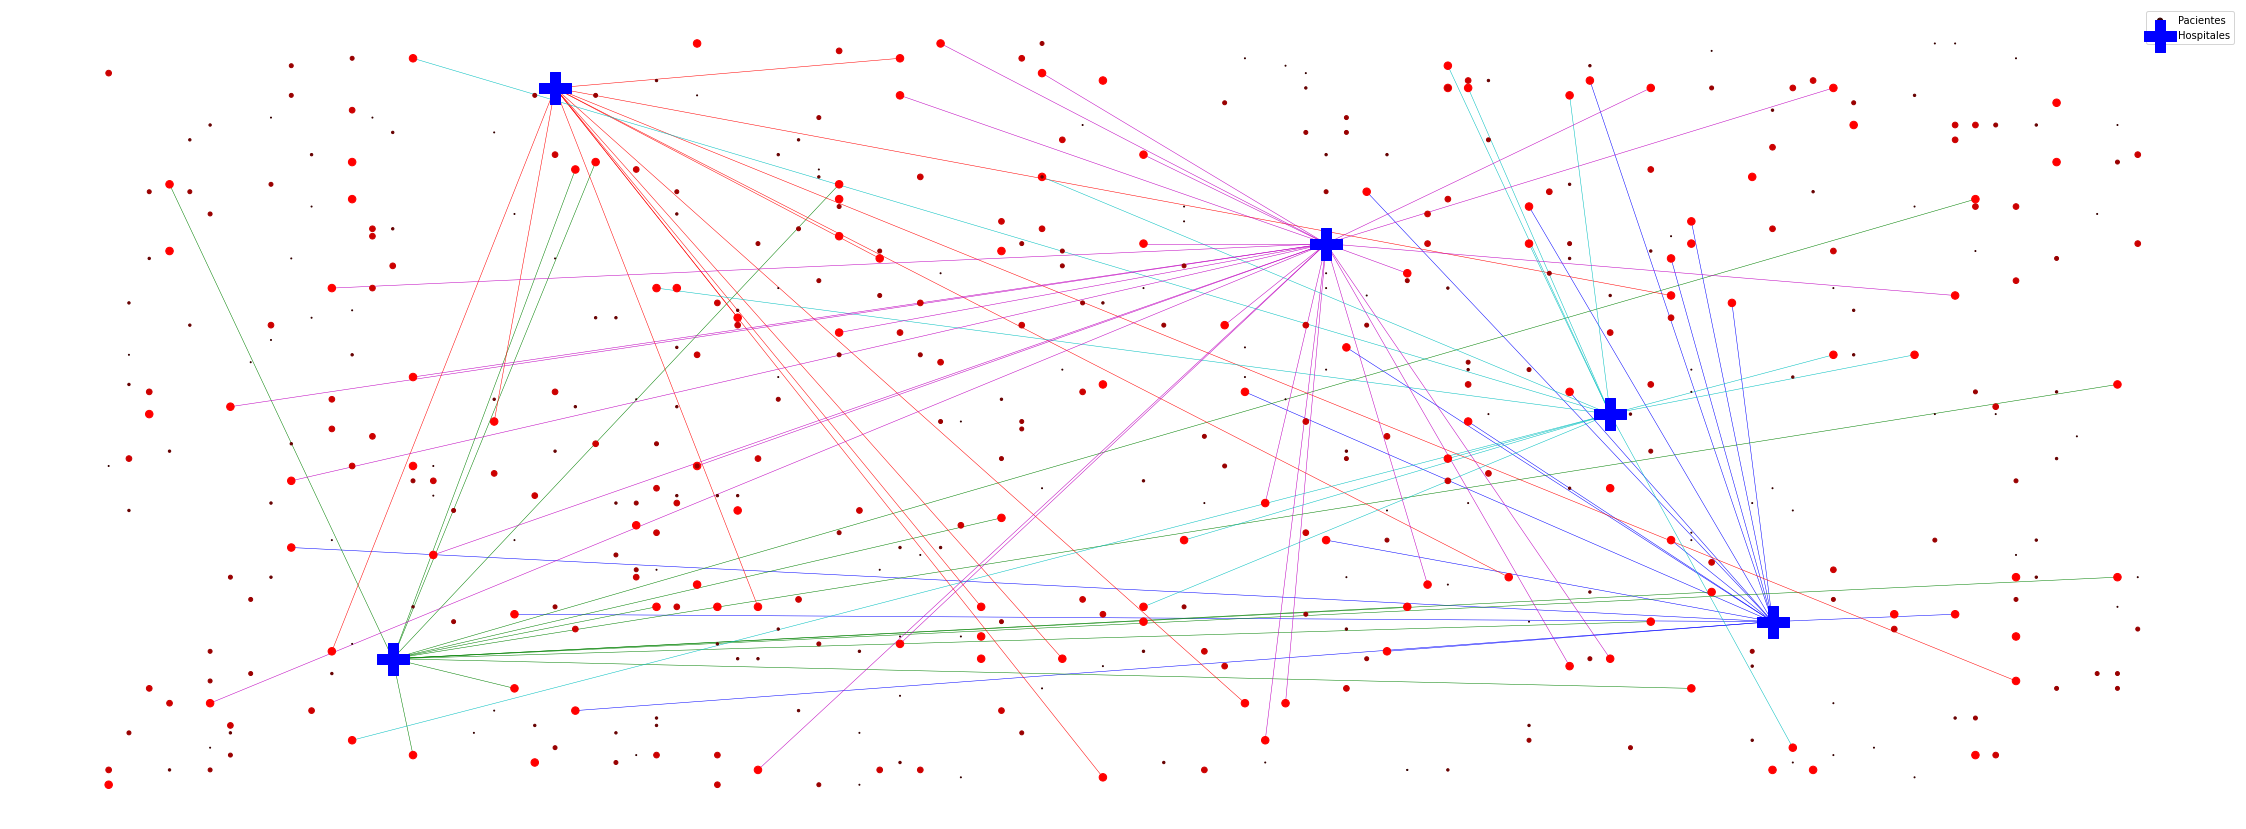

In [ ]:
from itertools import cycle

sombra_contagio = [int(sev*255/5) for sev in pacientes_contagio]
color_contagio = ["#%02x0000" % (sev) for sev in sombra_contagio]
tamano_contagio = [k**2.5 for k in pacientes_contagio]
plt.scatter(*zip(*pacientes_loc), s=tamano_contagio, c=color_contagio, label="Pacientes", zorder=2)
plt.scatter(*zip(*hospitales_loc), s=1000, c="b", marker="P", label="Hospitales", zorder=3)
colores = cycle('bgrcmk')
for i in range(n_hospitales):
  c = next(colores)
  for (x_, y_) in plot_lineas[i]:
    plt.plot(x_, y_, c=c, linewidth=0.5, zorder=1)
plt.legend()
plt.axis('off')
plt.show() 